In [36]:
import tensorflow as tf
import os

In [37]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [38]:
import numpy as np
from matplotlib import pyplot as plt

In [39]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 974 files belonging to 2 classes.


In [40]:
import cv2
import imghdr

In [41]:
data_iterator = data.as_numpy_iterator()

In [42]:
#Gets another batch of 32 images and labels
batch = data_iterator.next()

In [43]:
#Labels for images
batch[1].shape

(32,)

In [44]:
#Images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

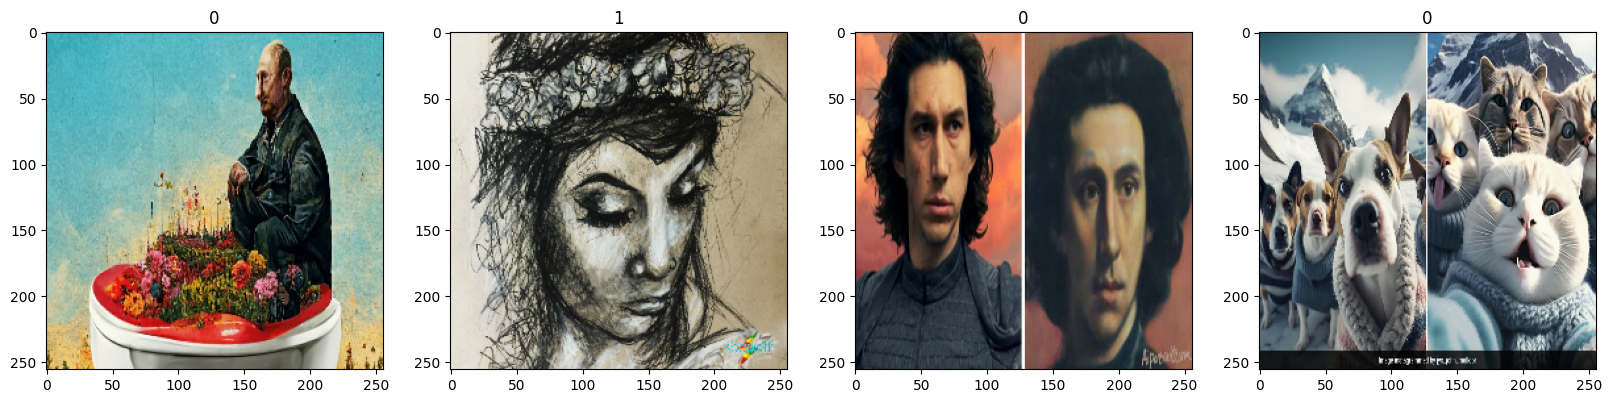

In [45]:
fig, ax = plt.subplots(ncols = 4, figsize = (20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx]) 

#Class 1 = AI
#Class 0 = Real

In [46]:
data = data.map(lambda x,y: (x/255, y))
len(data)

31

In [47]:
train_size = int(len(data)*.7)+1
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [48]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()